In [2]:
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import pandas as pd 
import numpy as np

sys.path.append(str(Path(Path.cwd()).parent))
from src.utils import DATA_DIR, IMG, EK

# Analyze actions

In [3]:
epic_root = Path(DATA_DIR)/'EPIC_KITCHENS_2018'

epic_action_data =  os.path.join(epic_root, 'annotations', 'EPIC_train_action_labels.csv')
epic_action_data = pd.read_csv(epic_action_data)
# print(epic_action_data)

epic_nouns = [x.replace(':', ' ') for x in epic_action_data.noun.unique()]

epic_verbs = epic_action_data.verb.unique()

epic_verb_noun = [x + ' ' + y.replace(':', ' ') for x,y in zip(epic_action_data.verb, epic_action_data.noun)]
epic_verb_noun = np.unique(epic_verb_noun)



In [ ]:
print('Actions')
for i, vn in enumerate(epic_verb_noun):
    print(i, vn)

In [ ]:
print('Nouns')
for i, n in enumerate(epic_nouns):
    print(i, n)

In [ ]:
print('Verbs')
for i, v in enumerate(epic_verbs):
    print(i, v)

# FPHA comparison

In [ ]:
fpha_nouns = ['juice', 'peanut butter', 'fork', 'spoon', 
              'milk', 'mug', 'tea bag', 'salt', 'liquid soap', 
              'sponge', 'soda can', 'spray', 'pen', 'paper', 
              'letter', 'book', 'calculator', 'match', 
              'cell charger', 'glasses', 'wallet', 'coin', 
              'card', 'wine bottle', 'wine glass', 'hand']

fpha_verbs = ['open', 'close', 'pour', 'prick', 'sprinkle', 'scoop', 
              'put', 'stir', 'drink', 'wash', 'flip', 'scratch', 'squeeze', 
              'use', 'write', 'tear', 'take', 'read', 'light', 'charge', 
              'unfold', 'clean', 'give', 'receive', 'toast', 'handshake', 'high']

fpha_actions = ['open juice bottle', 'close juice bottle', 'pour juice bottle', 
                'open peanut butter', 'close peanut butter', 'prick', 'sprinkle', 
                'scoop spoon', 'put sugar', 'stir', 'open milk', 'close milk', 
                'pour milk', 'drink mug', 'put tea bag', 'put salt', 'open liquid soap', 
                'close liquid soap', 'pour liquid soap', 'wash sponge', 'flip sponge', 
                'scratch sponge', 'squeeze sponge', 'open soda can', 'use flash', 'write', 
                'tear paper', 'squeeze paper', 'open letter', 'take letter from envelope', 
                'read letter', 'flip pages', 'use calculator', 'light candle', 'charge cell phone', 
                'unfold glasses', 'clean glasses', 'open wallet', 'give coin', 'receive coin', 
                'give card', 'pour wine', 'toast wine', 'handshake', 'high five']

In [ ]:
print('Nouns')
print('EK : FPHA')
print('---------')
for ekn in epic_nouns:
    for fn in fpha_nouns:
        ekn_split = ekn.split(' ')
        fn_split = fn.split(' ')
        if len(np.intersect1d(fn_split, ekn_split)) > 0:
            print(ekn, ':', fn)

In [ ]:
print('Verbs')
print('EK : FPHA')
print('---------')
for ekv in epic_verbs:
    for fv in fpha_verbs:
        ekv_split = ekv.split('-')
        if len(np.intersect1d(fv, ekv_split)) > 0:
            print(ekv, ':', fv)

In [ ]:
print('Actions')
print('EK : FPHA')
print('---------')
for eka in epic_verb_noun:
    for fa in fpha_actions:
        fa_split = fa.split(' ')
        eka_split = eka.split(' ')
        eka_split = [e.split('-') for e in eka_split]
        eka_list = []
        for eka_str in eka_split:
            for e in eka_str:
                eka_list.append(e)
        if len(np.intersect1d(fa_split, eka_list)) > 0:
            print(eka, ':', fa)

# Visualize

In [4]:
epic_root = Path(DATA_DIR)/'EPIC_KITCHENS_2018'
epic_img_root = epic_root/'frames_rgb_flow'
modality = 'rgb'
data_split = 'train'
subject_id = 1
frame_id = 99135
seq_id = 1

frame = 'frame_{:010d}'.format(frame_id)
subject = 'P{:02d}'.format(subject_id)
seq = subject + '_{:02d}'.format(seq_id)
img_path = epic_img_root/modality/data_split/subject/seq/(frame + '.jpg')
print(img_path)

/4TB/aaron/EPIC_KITCHENS_2018/frames_rgb_flow/rgb/train/P01/P01_01/frame_0000099135.jpg


In [ ]:
seq_path = epic_img_root/modality/data_split/subject/seq
all_frames = [x for x in os.listdir(seq_path) if os.path.join(seq_path, x)]
all_frames_idx = [(x.split('_')[-1][:-3]) for x in all_frames]
all_frames_idx = np.argsort(all_frames_idx).astype('uint32')
all_frames = np.asarray(all_frames)[all_frames_idx]
print(len(all_frames))

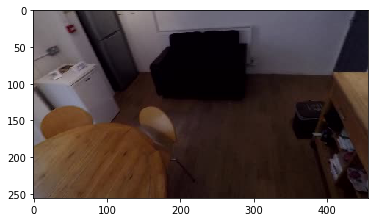

In [5]:
img = Image.open(img_path)
fig, ax = plt.subplots()
ax.imshow(img)

# Video

In [ ]:
idx = 0
epic_label = os.path.join(epic_root, 'annotations', 'EPIC_train_action_labels.csv')
epic_label = pd.read_csv(epic_label)
cur_vid = epic_label.loc[epic_label['uid'] == idx].to_numpy()[0]
subject_id = cur_vid[1]
seq = cur_vid[2]
action = cur_vid[3]
start_frame = cur_vid[6]
end_frame = cur_vid[7]
verb = cur_vid[8]
noun = cur_vid[10]
print(cur_vid)
print(noun.split(':')[0])

In [ ]:
from moviepy.editor import ImageSequenceClip
from tqdm import tqdm
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

image_id = all_frames[start_frame:end_frame]
frames = []
for idx in tqdm(image_id):
    img_path = epic_img_root/modality/data_split/subject/seq/idx
    img = Image.open(img_path)
    fig, ax = plt.subplots()
    ax = fig.gca()
    ax.imshow(img)
    ax.axis('off')
    fig.canvas.draw()
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(data)
    plt.close()
    
segment_clip = ImageSequenceClip(frames, fps=60)
segment_clip.ipython_display()

# Workspace

In [ ]:
EPIC_classes =  os.path.join(epic_root, 'annotations', 'EPIC_noun_classes.csv')
EPIC_classes = pd.read_csv(EPIC_classes)
print(EPIC_classes.loc[EPIC_classes['noun_id'] == 1].to_numpy()[0, 1])
# print(EPIC_classes)

In [ ]:
action_verb_class = np.sort(epic_action_data.verb_class.unique())
# print(action_verb_class, len(action_verb_class))

action_noun_class = np.sort(epic_action_data.noun_class.unique())
# print(action_noun_class, len(action_noun_class))

noun_lin_dict = EK.create_lin_id(np.sort(epic_action_data.noun_class.unique()))
for k, v in noun_lin_dict.items():
    print(k, v)